#           ***Inheritance***

### Child Class will inherit attributes and method of parent class

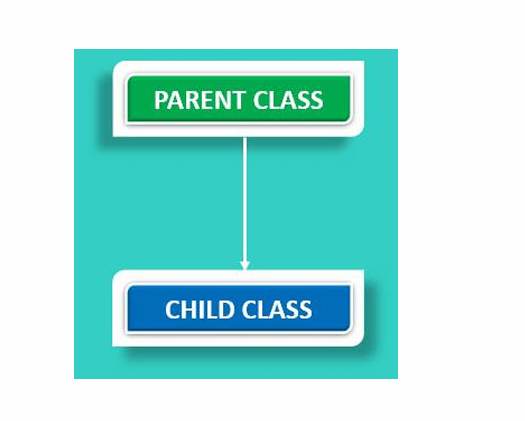

## Single  Inheritance

Parent -> Child 

One Parent ~ One Child

In [13]:
class Person:

    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My Name is {self.name}. I am {self.age} years old")

In [14]:
class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [15]:
p1 = Person(name="Rahul", age=23)
print(type(p1))

<class '__main__.Person'>


In [16]:
p1.name

'Rahul'

In [17]:
p1.intro()

My Name is Rahul. I am 23 years old


In [25]:
e1 = Employee(name="Sarthak", age=22, company="TCS")
print(type(e1))

<class '__main__.Employee'>


In [26]:
e1.name

'Sarthak'

In [27]:
e1.age

22

In [28]:
e1.company

'TCS'

In [29]:
e1.work()

I work at TCS


In [30]:
e1.intro()

My Name is Sarthak. I am 22 years old


In [24]:
e1.intro()
e1.work()

My Name is Sarthak. I am 22 years old
I work at TCS


In [31]:
print(e1)

In [32]:
e2 = Employee(name="Aditi", age=22, company="Infosys")

In [33]:
e2.name

'Aditi'

In [34]:
e2.age

22

In [36]:
e2.work()

I work at Infosys


In [37]:
e2.work()
e2.intro()

I work at Infosys
My Name is Aditi. I am 22 years old


## I want to do easy Data Validation

##### Library Pydantic -> To validate Data
##### Pydantic contains class called BaseModel -> Validates the Data for You
##### Field is used to add different constraints on Data

In [38]:
!uv add pydantic

Resolved 68 packages in 22ms
Audited 62 packages in 1ms


## Keywords
1. ge - greater than or equal to
2. le - less than or equal to
3. gt - greater than
4. lt - less than

In [51]:
from pydantic import BaseModel, Field
from typing import Literal


class Student(BaseModel):
    roll_no: int = Field(ge=1, le=1000)
    name: str = Field(min_length=2, max_length=40)
    gender: Literal["Male", "Female"]
    marks: float = Field(ge=0, le=100)
    hobbies: list[str] = Field(default_factory=list)

    def get_info(self):
        print(f"Student roll_no : {self.roll_no}")
        print(f"Student name : {self.name}")
        print(f"Student gender : {self.gender}")
        print(f"Marks : {self.marks:.2f}")
        print(f"Hobbies : {self.hobbies}")

In [52]:
s1 = Student(
    roll_no=1, name="Raman", gender="Male", marks=83.5, hobbies=["singing", "dancing"]
)

In [53]:
s1.name

'Raman'

In [54]:
s1.hobbies

['singing', 'dancing']

In [55]:
s1.marks

83.5

In [56]:
s1.get_info()

Student roll_no : 1
Student name : Raman
Student gender : Male
Marks : 83.50
Hobbies : ['singing', 'dancing']


In [58]:
s1.model_dump()

{'roll_no': 1,
 'name': 'Raman',
 'gender': 'Male',
 'marks': 83.5,
 'hobbies': ['singing', 'dancing']}

In [63]:
s2 = Student(
    roll_no=2,
    name="Aditi",
    gender="Female",
    marks=75.6,
    hobbies=["Singing", "Trecking"],
)
print(s2)

roll_no=2 name='Aditi' gender='Female' marks=75.6 hobbies=['Singing', 'Trecking']


In [65]:
s2.get_info()

Student roll_no : 2
Student name : Aditi
Student gender : Female
Marks : 75.60
Hobbies : ['Singing', 'Trecking']


In [70]:
s2.name

'Aditi'

In [71]:
s2.roll_no

2

In [72]:
print(s2)

roll_no=2 name='Aditi' gender='Female' marks=75.6 hobbies=['Singing', 'Trecking']


In [73]:
print(s1)
print(s2)

roll_no=1 name='Raman' gender='Male' marks=83.5 hobbies=['singing', 'dancing']
roll_no=2 name='Aditi' gender='Female' marks=75.6 hobbies=['Singing', 'Trecking']


In [74]:
s2.model_dump()

{'roll_no': 2,
 'name': 'Aditi',
 'gender': 'Female',
 'marks': 75.6,
 'hobbies': ['Singing', 'Trecking']}